In [39]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [40]:
data = pd.read_csv("./data/after_first_process_data.csv")
data = data.dropna()
data.rename(columns={'y': 'subscribed'}, inplace=True)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2008,2008-05-01


In [41]:
#Discretization of campaign variabile into 1, 2,3 and 3+
data.loc[data.campaign > 3, 'campaign'] = 4
data.groupby('campaign').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
campaign,,,,,,,,,,,,,,,,,,,,,
1,17642,17642,17642,17642,17642,17642,17642,17642,17642,17642,...,17642,17642,17642,17642,17642,17642,17642,17642,17642,17642
2,10570,10570,10570,10570,10570,10570,10570,10570,10570,10570,...,10570,10570,10570,10570,10570,10570,10570,10570,10570,10570
3,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,...,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341
4,7635,7635,7635,7635,7635,7635,7635,7635,7635,7635,...,7635,7635,7635,7635,7635,7635,7635,7635,7635,7635


In [42]:
#convert pdays into binary - 999 - 0 - never contacted, 1- contacted before
data.groupby('pdays').count()

data.loc[(data.pdays != 999), 'pdays'] = 1
data.loc[(data.pdays == 999), 'pdays'] = 0
data.rename(columns={'pdays': 'contacted_before'}, inplace=True)
data.groupby('contacted_before').count()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
contacted_before,,,,,,,,,,,,,,,,,,,,,
0,39673,39673,39673,39673,39673,39673,39673,39673,39673,39673,...,39673,39673,39673,39673,39673,39673,39673,39673,39673,39673
1,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515,...,1515,1515,1515,1515,1515,1515,1515,1515,1515,1515


In [43]:
#convert previous into binary - 0 - never contacted, 1- contacted before
data.groupby('previous').count()

data.loc[(data.previous != 0), 'previous'] = 1
data.loc[(data.previous == 0), 'previous'] = 0
data.rename(columns={'previous': 'previous'}, inplace=True)
data.groupby('previous').count()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,contacted_before,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
previous,,,,,,,,,,,,,,,,,,,,,
0,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563,...,35563,35563,35563,35563,35563,35563,35563,35563,35563,35563
1,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625,...,5625,5625,5625,5625,5625,5625,5625,5625,5625,5625


In [44]:
#bin emp.var.rate into 3 levels: smaller -1.8, (-1.8:-0.1), larger -0.1
#df['Fee'] = np.where((df['Fee'] >= 22000) & (df['Courses'] == 'PySpark'), 14000, df['Fee'])

data['emp.var.rate'] = np.where((data['emp.var.rate'] <= -1.8), -2, data['emp.var.rate'] )
data['emp.var.rate'] = np.where((data['emp.var.rate'] > -1.8) & (data['emp.var.rate'] <=-0.1), -1.8, data['emp.var.rate'] )
data['emp.var.rate'] = np.where((data['emp.var.rate'] > -0.1), -0.1, data['emp.var.rate'] )

data.loc[(data['emp.var.rate'] == -2), 'emp.var.rate'] = 1
data.loc[(data['emp.var.rate'] == -1.8), 'emp.var.rate'] = 2
data.loc[(data['emp.var.rate'] == -0.1), 'emp.var.rate'] = 3

data.groupby('emp.var.rate').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,contacted_before,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
emp.var.rate,,,,,,,,,,,,,,,,,,,,,
1.0,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,...,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090
2.0,5101,5101,5101,5101,5101,5101,5101,5101,5101,5101,...,5101,5101,5101,5101,5101,5101,5101,5101,5101,5101
3.0,23997,23997,23997,23997,23997,23997,23997,23997,23997,23997,...,23997,23997,23997,23997,23997,23997,23997,23997,23997,23997


In [45]:
#

In [46]:
data.groupby('marital').count()

#unknown marital status will be rolled into married

data.loc[(data.marital == 'unknown'), 'marital'] = 'married'


In [47]:
data.groupby('job').count()

#unknown job category will be rolled into admin

data.loc[(data.job == 'unknown'), 'job'] = 'admin.'


In [48]:
data.groupby('education').count()

#combine illiterare with unknown, illiterate is not significant by itself 

data.loc[(data.education == 'illiterate'), 'education'] = 'unknown'
data.groupby('education').count()

,age,job,marital,default,housing,loan,contact,month,day_of_week,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
education,,,,,,,,,,,,,,,,,,,,,
basic.4y,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,...,4176,4176,4176,4176,4176,4176,4176,4176,4176,4176
basic.6y,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292,...,2292,2292,2292,2292,2292,2292,2292,2292,2292,2292
basic.9y,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,...,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045
high.school,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515,...,9515,9515,9515,9515,9515,9515,9515,9515,9515,9515
professional.course,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243,...,5243,5243,5243,5243,5243,5243,5243,5243,5243,5243
university.degree,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168,...,12168,12168,12168,12168,12168,12168,12168,12168,12168,12168
unknown,1749,1749,1749,1749,1749,1749,1749,1749,1749,1749,...,1749,1749,1749,1749,1749,1749,1749,1749,1749,1749


In [49]:
data.groupby('loan').count()

#combine illiterare with unknown, illiterate is not significant by itself 

data.loc[(data.loan == 'unknown'), 'loan'] = 'no'
data.groupby('loan').count()

,age,job,marital,education,default,housing,contact,month,day_of_week,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
loan,,,,,,,,,,,,,,,,,,,,,
no,34940,34940,34940,34940,34940,34940,34940,34940,34940,34940,...,34940,34940,34940,34940,34940,34940,34940,34940,34940,34940
yes,6248,6248,6248,6248,6248,6248,6248,6248,6248,6248,...,6248,6248,6248,6248,6248,6248,6248,6248,6248,6248


In [50]:
data.groupby('housing').count()

#combine illiterare with unknown, illiterate is not significant by itself 

data.loc[(data.housing == 'unknown'), 'housing'] = 'no'
data.groupby('housing').count()

,age,job,marital,education,default,loan,contact,month,day_of_week,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
housing,,,,,,,,,,,,,,,,,,,,,
no,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612,...,19612,19612,19612,19612,19612,19612,19612,19612,19612,19612
yes,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576,...,21576,21576,21576,21576,21576,21576,21576,21576,21576,21576


In [51]:
data.groupby('default').count()

#combine illiterare with unknown, illiterate is not significant by itself 

# data.loc[(data.housing == 'unknown'), 'housing'] = 'no'
# data.groupby('housing').count()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
default,,,,,,,,,,,,,,,,,,,,,
no,32588,32588,32588,32588,32588,32588,32588,32588,32588,32588,...,32588,32588,32588,32588,32588,32588,32588,32588,32588,32588
unknown,8597,8597,8597,8597,8597,8597,8597,8597,8597,8597,...,8597,8597,8597,8597,8597,8597,8597,8597,8597,8597
yes,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


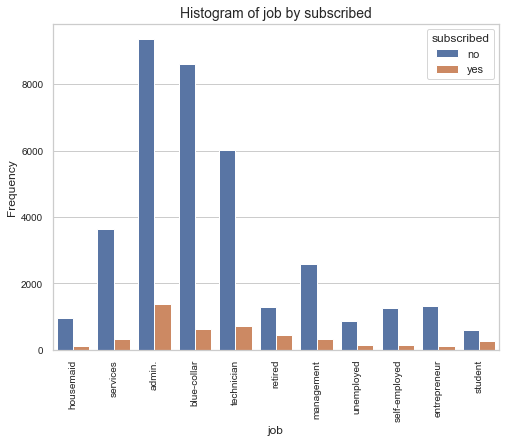

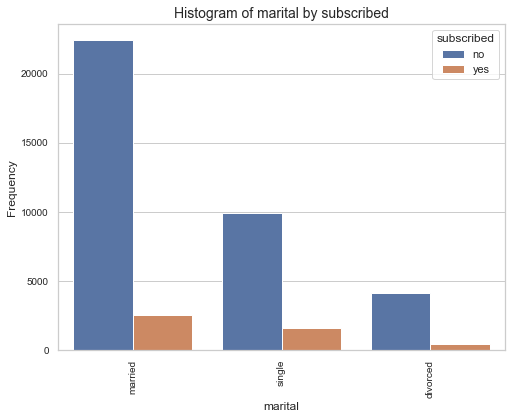

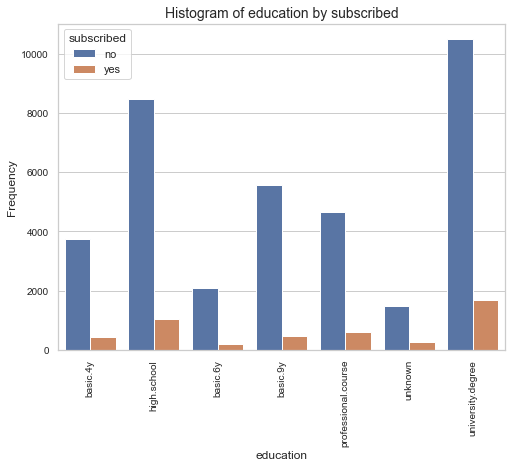

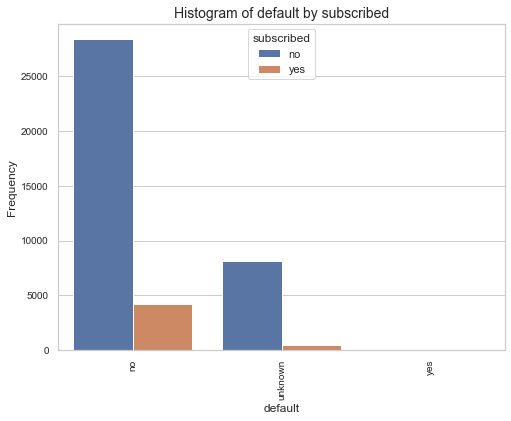

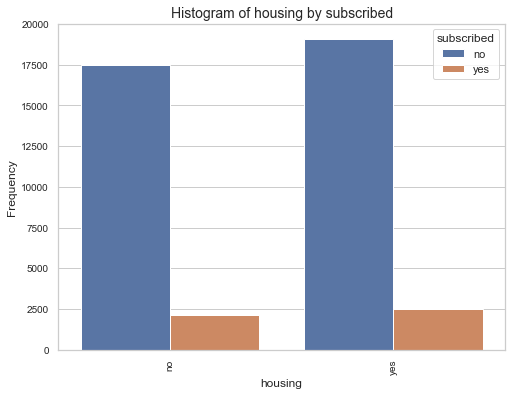

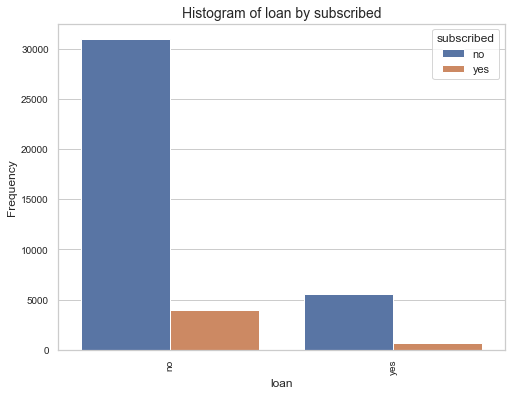

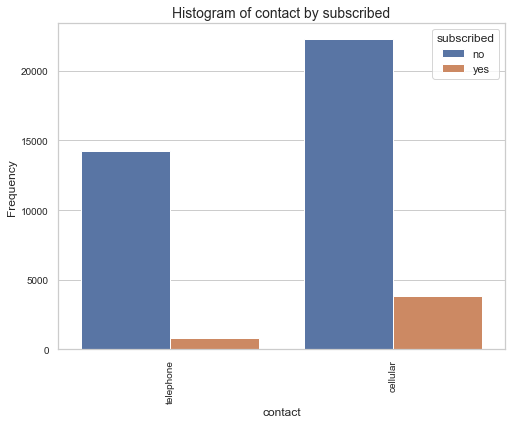

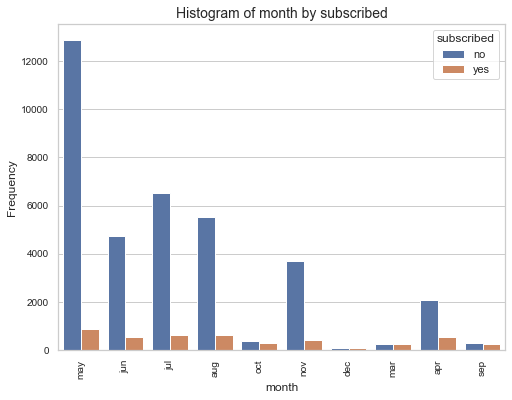

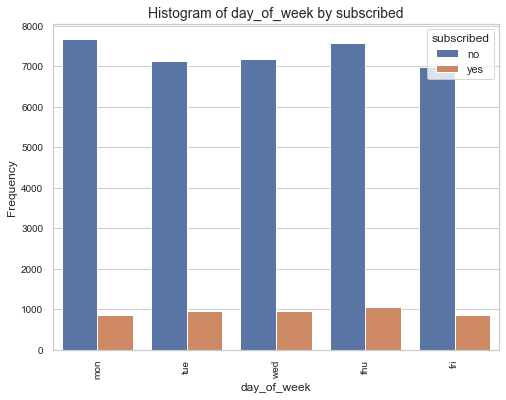

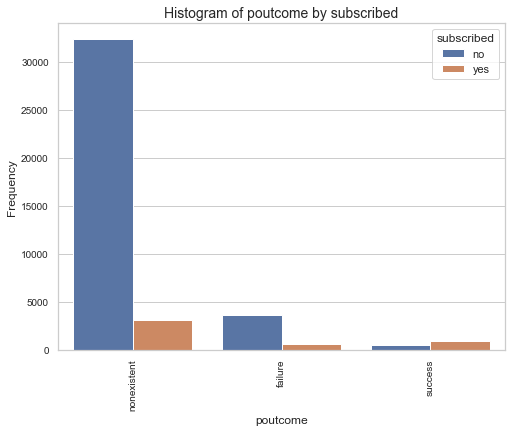

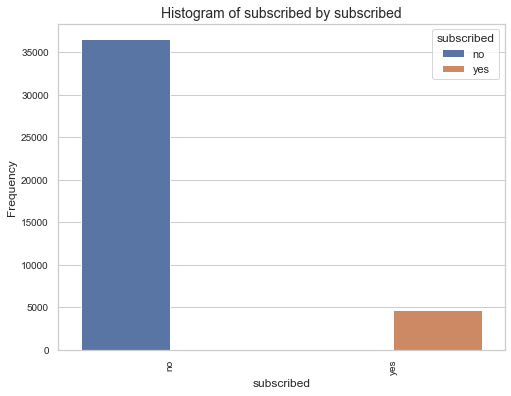

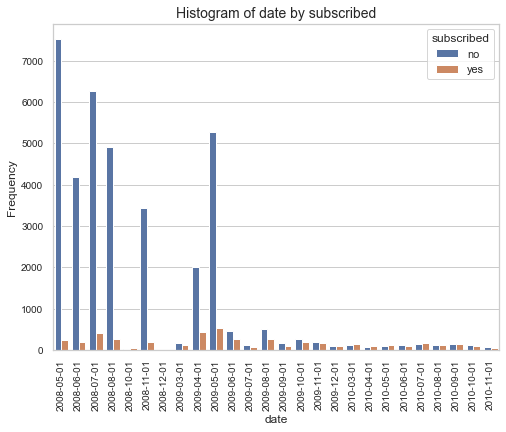

In [52]:
def separate_variables(df):
    numeric_vars = df.select_dtypes(include=['float64', 'int64'])
    categorical_vars = df.select_dtypes(include=['object'])
    return numeric_vars, categorical_vars

numeric_df, categorical_df = separate_variables(data)

def plot_histogram(data, column, y):
    plt.figure(figsize=(8, 6)) 
    sns.countplot(x=column,hue=y, data=data) 
    plt.title(f'Histogram of {column} by {y}', fontsize=14)  
    plt.xlabel(column, fontsize=12) 
    plt.ylabel('Frequency', fontsize=12)  
    plt.xticks(rotation='vertical',fontsize=10)  
    plt.yticks(fontsize=10)  
    plt.show()

for column in categorical_df.columns:
    plot_histogram(data, column, y='subscribed')

In [53]:
# At this point, data is ready for sampling

# validation data - from 2010-09-01 to latest

data.info()
validation_data = data.loc[data['date'] >= '2010-09-01']

validation_data.to_csv('./data/validation_set.csv', index=False)
validation_data


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41188 non-null  int64  
 1   job               41188 non-null  object 
 2   marital           41188 non-null  object 
 3   education         41188 non-null  object 
 4   default           41188 non-null  object 
 5   housing           41188 non-null  object 
 6   loan              41188 non-null  object 
 7   contact           41188 non-null  object 
 8   month             41188 non-null  object 
 9   day_of_week       41188 non-null  object 
 10  campaign          41188 non-null  int64  
 11  contacted_before  41188 non-null  int64  
 12  previous          41188 non-null  int64  
 13  poutcome          41188 non-null  object 
 14  emp.var.rate      41188 non-null  float64
 15  cons.price.idx    41188 non-null  float64
 16  cons.conf.idx     41188 non-null  float6

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
40553,64,retired,married,professional.course,no,yes,no,cellular,sep,wed,...,0,nonexistent,2.0,94.199,-37.5,0.886,4963.6,yes,2010,2010-09-01
40554,72,retired,married,professional.course,no,no,no,cellular,sep,wed,...,1,failure,2.0,94.199,-37.5,0.886,4963.6,no,2010,2010-09-01
40555,34,admin.,married,university.degree,no,yes,no,cellular,sep,wed,...,1,failure,2.0,94.199,-37.5,0.886,4963.6,no,2010,2010-09-01
40556,69,retired,married,high.school,no,yes,yes,cellular,sep,wed,...,1,success,2.0,94.199,-37.5,0.886,4963.6,yes,2010,2010-09-01
40557,33,technician,married,professional.course,no,yes,no,cellular,sep,wed,...,0,nonexistent,2.0,94.199,-37.5,0.886,4963.6,yes,2010,2010-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,2.0,94.767,-50.8,1.028,4963.6,yes,2010,2010-11-01
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,2.0,94.767,-50.8,1.028,4963.6,no,2010,2010-11-01
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,2.0,94.767,-50.8,1.028,4963.6,no,2010,2010-11-01
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,2.0,94.767,-50.8,1.028,4963.6,yes,2010,2010-11-01


In [54]:
#recode yes/no in 1/0 for target
data.subscribed.replace(('yes', 'no'), (1, 0), inplace=True)

In [55]:
#campaign into 4 ordinal bins
data.groupby('campaign').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,year,date
campaign,,,,,,,,,,,,,,,,,,,,,
1,17642,17642,17642,17642,17642,17642,17642,17642,17642,17642,...,17642,17642,17642,17642,17642,17642,17642,17642,17642,17642
2,10570,10570,10570,10570,10570,10570,10570,10570,10570,10570,...,10570,10570,10570,10570,10570,10570,10570,10570,10570,10570
3,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,...,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341
4,7635,7635,7635,7635,7635,7635,7635,7635,7635,7635,...,7635,7635,7635,7635,7635,7635,7635,7635,7635,7635


In [56]:
### Discretization/binning
from optbinning import OptimalBinning

# This function takes in a dataframe and a set list of columns
# returns a copy of the dataframe with discretized cols
def find_optimal_binning_split(dataframe, cols):
    df = dataframe.copy()
    target = np.array(df['subscribed'])
    for i in cols:
        array = np.array(df[i])
        optb = OptimalBinning(name=i, dtype="numerical", solver="cp", outlier_detector='range',max_n_bins=5)
        print(optb)
        optb.fit(array, target)
        splits = optb.splits
        print(i)
        print('SPLITS:',splits)

        # Converting the splits array back into list before passing it as param 'bins' to pd.cut
        bins = splits.tolist()
        # Add value -inf at the start of the array, and inf at the end 
        bins.insert(0,-np.inf)
        bins.append(np.inf)

        print('BINS:',bins)
        print('--------------------------------------------------------------')
        # Replace the column with the result of cut
        df[i] = pd.cut(df[i],bins,include_lowest=True, labels=False )
    return df

#bureau_per included for binning
disc_cols =  ['cons.price.idx','cons.conf.idx','euribor3m', 'nr.employed']
# should only the purify_cols be passed here? why not the rest of the numeric cols
data = find_optimal_binning_split(data,disc_cols )
data.info()


OptimalBinning(max_n_bins=5, name='cons.price.idx', outlier_detector='range')
cons.price.idx
SPLITS: [92.86800003 93.13749695 93.95600128 94.01050186]
BINS: [-inf, 92.86800003051758, 93.13749694824219, 93.95600128173828, 94.01050186157227, inf]
--------------------------------------------------------------
OptimalBinning(max_n_bins=5, name='cons.conf.idx', outlier_detector='range')
cons.conf.idx
SPLITS: [-46.64999962 -36.95000076 -36.25       -35.44999886]
BINS: [-inf, -46.64999961853027, -36.95000076293945, -36.25, -35.44999885559082, inf]
--------------------------------------------------------------
OptimalBinning(max_n_bins=5, name='euribor3m', outlier_detector='range')
euribor3m
SPLITS: [1.23949999 3.16750002 4.84100008 4.85749984]
BINS: [-inf, 1.2394999861717224, 3.1675000190734863, 4.841000080108643, 4.857499837875366, inf]
--------------------------------------------------------------
OptimalBinning(max_n_bins=5, name='nr.employed', outlier_detector='range')
nr.employed
SPLITS:

In [57]:

data.to_csv('data/after_feature_adjust_data.csv', index=False)

#Sampling train/test ???
#disc_model_data = disc_data[disc_data['date'] < '2010-09-01']

#disc_model_data.to_csv('./data/disc_model_data.csv',index=False)

model_data = data.loc[data['date'] < '2010-09-01']

model_data = model_data.drop(columns=['date'])

model_data.to_csv('./data/model_data.csv',index=False)

from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
training_data, testing_data = train_test_split(model_data, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

testing_data.to_csv('./data/testing_set.csv', index=False)


#Apply sampling techniques to training data

training_data.to_csv('./data/training_set.csv', index=False)


No. of training examples: 28387
No. of testing examples: 12166
